In [ ]:
# Deterministic & Stochastic GridWorld
# Author: Divya Pallineni (vpalline)
# Date: 15th Feb 2023
# Refrences: Resources shared in Piazza
#      1.spring_23_rl_lec_3_random_agent.ipynb
#      2.visualizing_rl_environments_and_representing_the_results

In [25]:
pwd

'/user/vpalline'

In [26]:
!which python

/projects/academic/courses/cse546s23/vpalline/anaconda3/bin/python


In [27]:
#Importing all the required packages
import gymnasium as gym
import gym
import copy
import random
import time
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces
from operator import add
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [28]:
#GridWorld Game - Environment Definition
grid_world = np.zeros((5,5))
grid_world_size = (5,5)
print("GridWorld Game Size:",grid_world_size[0],"x",grid_world_size[1])

#GridWorld Game - Agent(Mario) Action Set Definition
action_space = ["Up","Down","Right","Left"]
print("GridWorld Game Set of Actions:", *action_space, sep=', ')

GridWorld Game Size: 5 x 5
GridWorld Game Set of Actions:, Up, Down, Right, Left


## **1. DETERMINISTIC ENVIRONMENT**

In [93]:
class Mario_Game_Deterministic_Environment(gym.Env):
    def __init__(self, max_timeSteps):
        #GridWorld Game - Observation space Definition( no. of rows * columns)
        self.observation_space = spaces.Discrete(25)
        #GridWorld Game - Setting the maximum no. of steps agent can take
        self.max_timeSteps = 16
            
    def reset(self):

        #GridWorld Game - Agent's Initial Position
        self.agent_pos = np.array([0, 4])
        #GridWorld Game - Agent's EndGoal Position
        self.end_goal_pos = np.array([4, 0])

        #GridWorld Game - Positions of Gold_Chest (+ Reward)
        self.gold_chest_pos= np.array([[0,1],[1,3],[3,4],[4,1]])
        #GridWorld Game - Positions of Food (+ Reward)
        self.Food_pos = np.array([[2,4],[1,0],[4,3]])
        #GridWorld Game - Positions of devils (- Reward)
        self.devil_pos = np.array([[2,0],[0,2]])
        #GridWorld Game - Positions of dragons (- Reward)
        self.dragon_pos = np.array([[2,2]])

        #GridWorld Game - Setting initial values for rewards, cumulative_rewards,timesteps
        self.rewards = 0      
        self.cumulative_rewards = 0
        self.timeStep = 0
        self.state = np.zeros(grid_world_size)
        self.done = False
        return
    
    def step(self, action):
        if action == 3:
            #Action = Left
            self.agent_pos[0] -= 1
        if action == 1:
            #Action = Right
            self.agent_pos[0] += 1
        if action == 2:
            #Action = Up
            self.agent_pos[1] += 1
        if action == 0:
            #Action = Down
            self.agent_pos[1] -= 1
        
        #To ensure the Agent is within the 5x5 grid limits - clip function
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros(grid_world_size)
        
        #GridWorld Game Rewards Configuration
        reward = 0
        if (self.agent_pos == self.end_goal_pos).all():
            reward = 50
            self.done = True
            self.rewards += 1
        if (np.any(np.all(self.agent_pos == self.gold_chest_pos, axis=1))):
            reward = 10
        if (np.any(np.all(self.agent_pos == self.Food_pos, axis=1))):
            reward = 25    
        if (np.any(np.all(self.agent_pos == self.devil_pos, axis=1))):
            reward = -5
        if (np.any(np.all(self.agent_pos == self.dragon_pos, axis=1))):
            reward = -10

        #Calculating the cummulative rewards until the current timestep
        self.cumulative_rewards += reward
        self.timeStep += 1

        #Checking if we reached Goal Position or reached the maximum timesteps allowed
        if not self.done:
            self.done = True if self.timeStep >= self.max_timeSteps else False

        #Storing the Agent's  Current Position and Reward , Cummulative Rewards
        info = "Current Agent Position: [" + str(self.agent_pos[0]) + "," + str(self.agent_pos[1]) + "] ; " + "Current State Reward: " + str(reward) + " ; " + "Total Cumulative Reward: " + str(self.cumulative_rewards)
        return reward, self.done, info
    
    def render(self):
        #Plot size
        fig,ax = plt.subplots(figsize=(7.5,7.5),facecolor="white")
        ax.set_xlim(0,5)
        ax.set_ylim(0,5)
        plt.grid()
        ax.set_facecolor("black")
        agent1_pos,goal1_pos = False,False
        plt.xticks([0,1,2,3,4,5])
        plt.yticks([0,1,2,3,4,5])

        if not agent1_pos:
            #For Agent's Visualization
            agent = AnnotationBbox(OffsetImage(plt.imread('agent.png'), zoom=0.2), list(map(add, self.agent_pos , [0.3, 0.4])), frameon=True)
            ax.add_artist(agent)

        if not goal1_pos:
            #For End Goal Visulaization
            goal = AnnotationBbox(OffsetImage(plt.imread('goal_pos.png'), zoom=0.087), list(map(add, self.end_goal_pos , [0.5, 0.4])), frameon=False)
            ax.add_artist(goal)

        for Food1_pos in self.Food_pos:
            #For Mushrooom Food State Visualization
            Food = AnnotationBbox(OffsetImage(plt.imread('Food.png'), zoom=0.098), list(map(add, Food1_pos, [0.68, 0.68])), frameon=False)
            ax.add_artist(Food)

        for gold1_chest_pos in self.gold_chest_pos:
            #For Gold Chest State Visulaization
            gold = AnnotationBbox(OffsetImage(plt.imread('gold_chest.png'), zoom=0.175), list(map(add, gold1_chest_pos, [0.7, 0.7])), frameon=False)
            ax.add_artist(gold)

        for devil1_pos in self.devil_pos:
            #For Devil state Visualization
            devil = AnnotationBbox(OffsetImage(plt.imread('Devil.png'), zoom=0.25), list(map(add, devil1_pos, [0.72, 0.72])), frameon=False)
            ax.add_artist(devil)

        for dragon1_pos in self.dragon_pos:
            #For Dragon state Visualization
            dragon = AnnotationBbox(OffsetImage(plt.imread('Dragon.png'), zoom=0.2), list(map(add, dragon1_pos, [0.7, 0.7])), frameon=False)
            ax.add_artist(dragon)

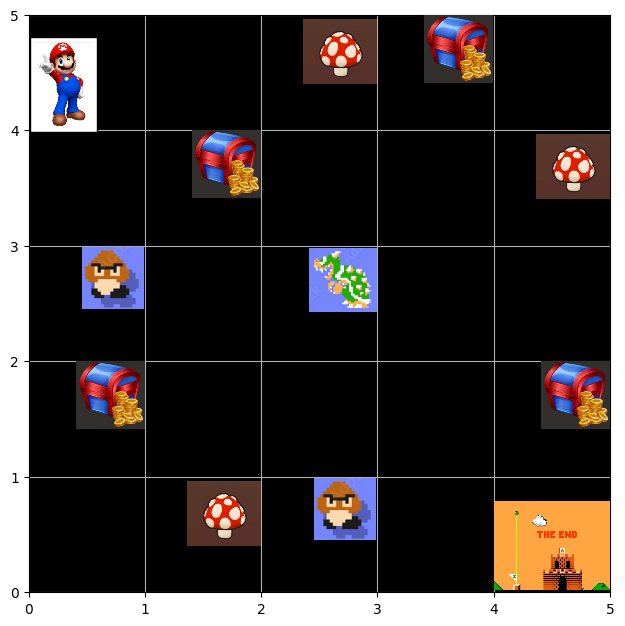

In [94]:
# Initial State Position of the Environment
env = Mario_Game_Deterministic_Environment(16) 
env.reset()
env.render()

Timestep: 1			 Performing Action: Left
Current Agent Position: [0,4] ; Current State Reward: 0 ; Total Cumulative Reward: 0
Timestep: 2			 Performing Action: Right
Current Agent Position: [1,4] ; Current State Reward: 0 ; Total Cumulative Reward: 0
Timestep: 3			 Performing Action: Down
Current Agent Position: [1,3] ; Current State Reward: 10 ; Total Cumulative Reward: 10
Timestep: 4			 Performing Action: Right
Current Agent Position: [2,3] ; Current State Reward: 0 ; Total Cumulative Reward: 10
Timestep: 5			 Performing Action: Down
Current Agent Position: [2,2] ; Current State Reward: -10 ; Total Cumulative Reward: 0
Timestep: 6			 Performing Action: Down
Current Agent Position: [2,1] ; Current State Reward: 0 ; Total Cumulative Reward: 0
Timestep: 7			 Performing Action: Left
Current Agent Position: [1,1] ; Current State Reward: 0 ; Total Cumulative Reward: 0
Timestep: 8			 Performing Action: Down
Current Agent Position: [1,0] ; Current State Reward: 25 ; Total Cumulative Reward: 25

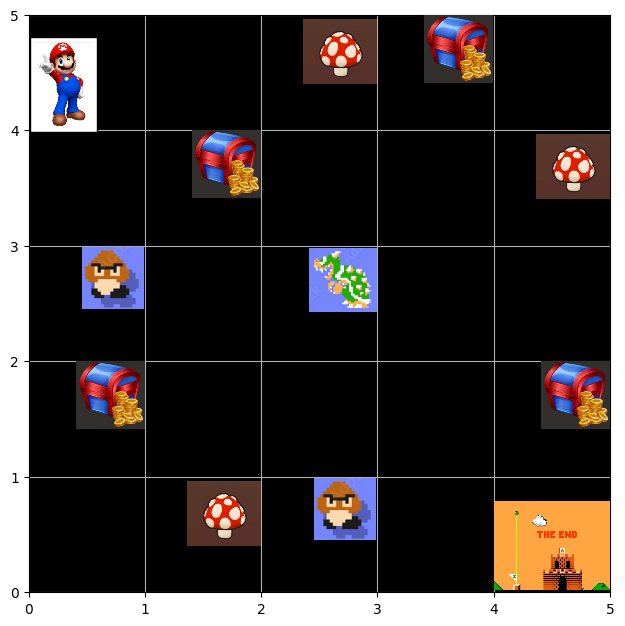

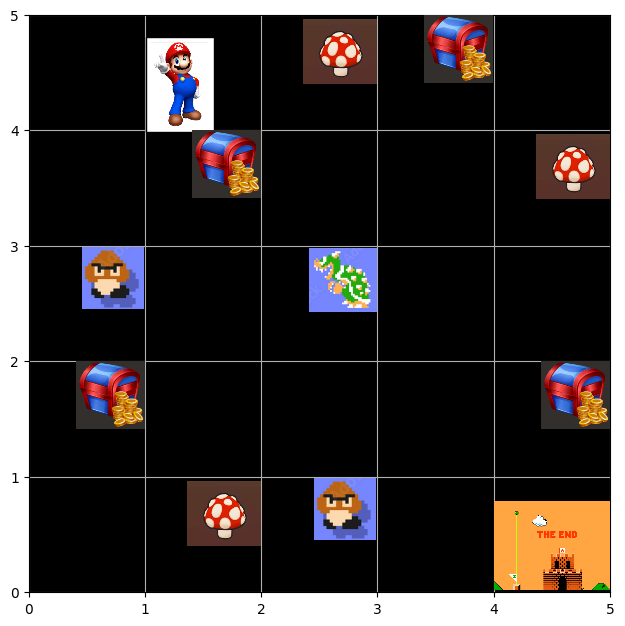

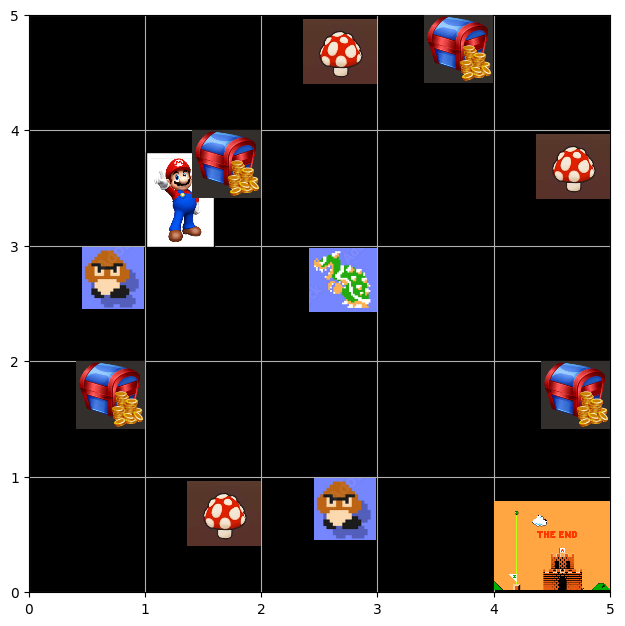

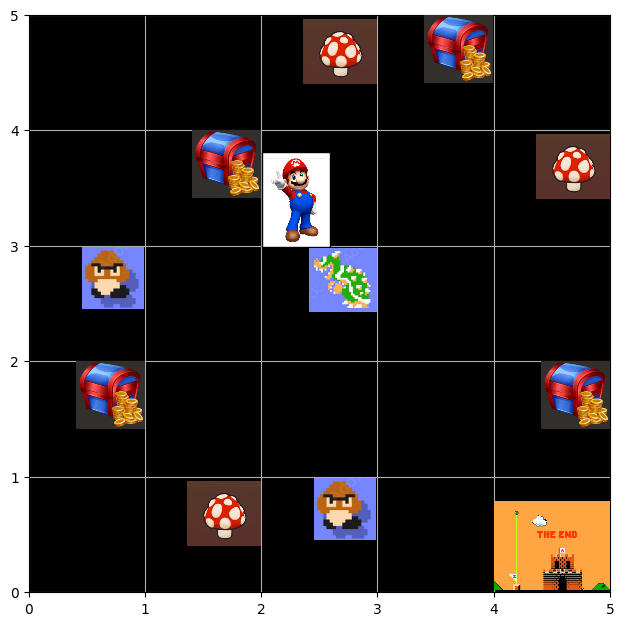

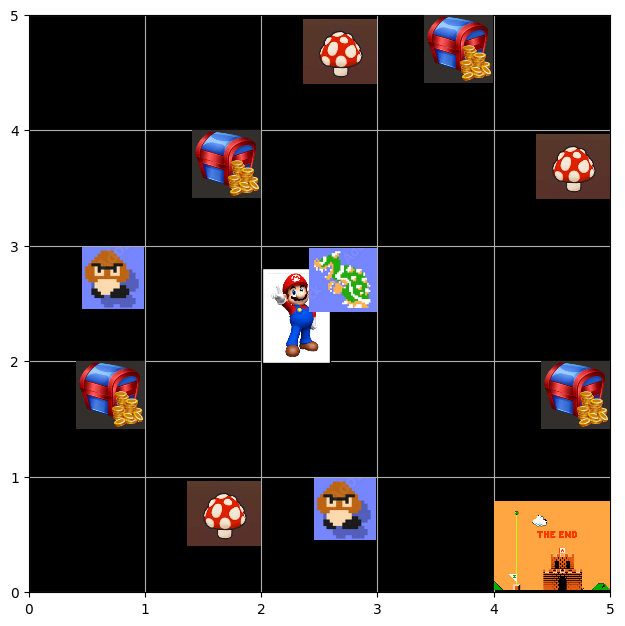

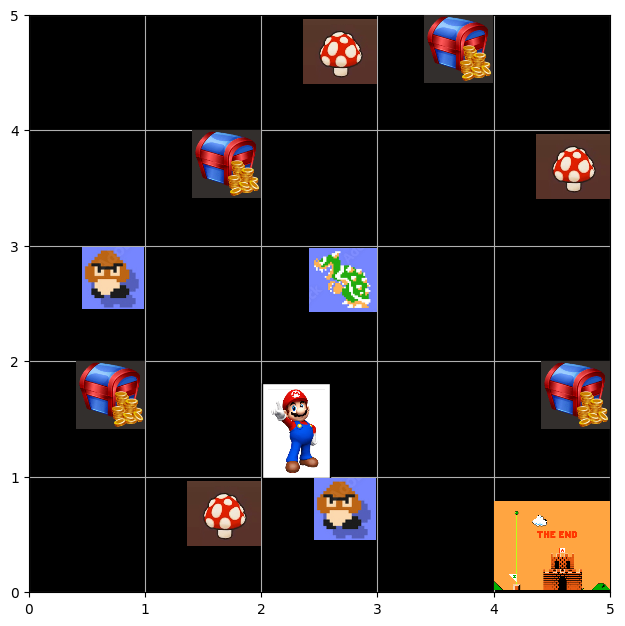

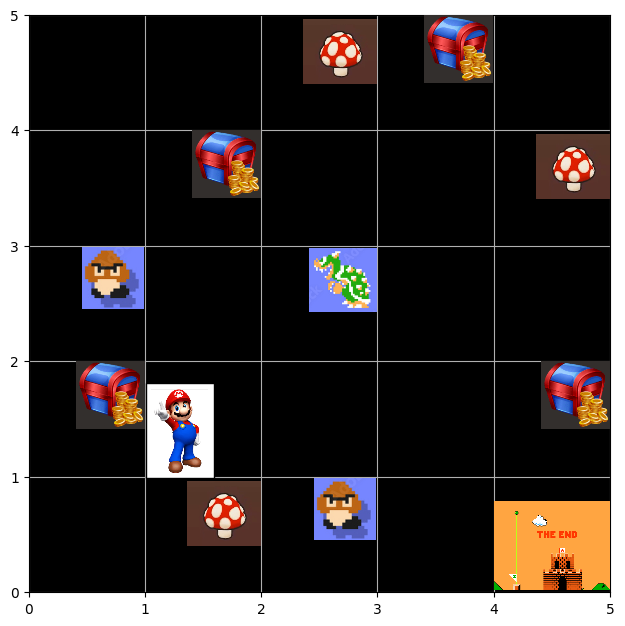

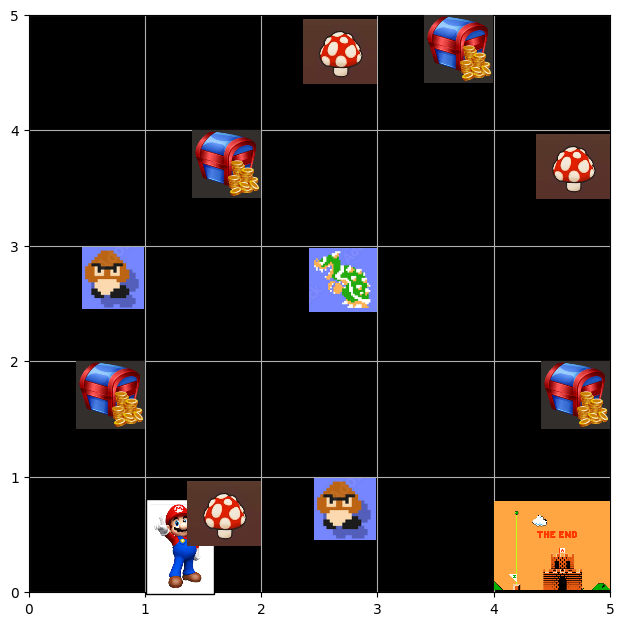

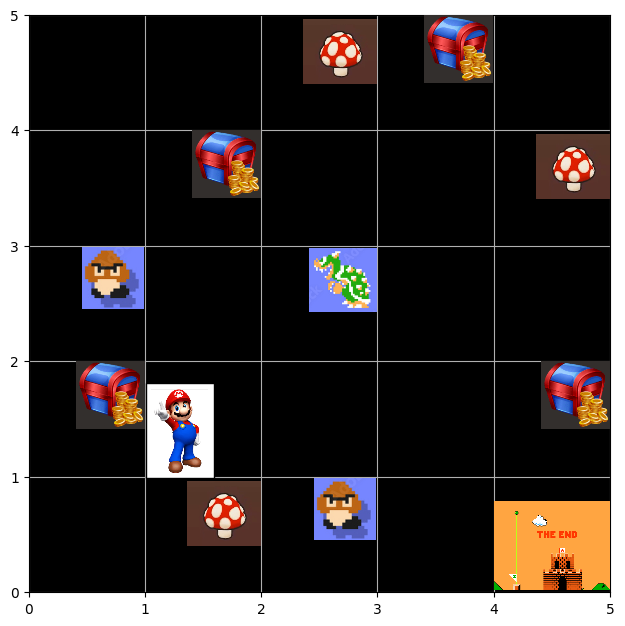

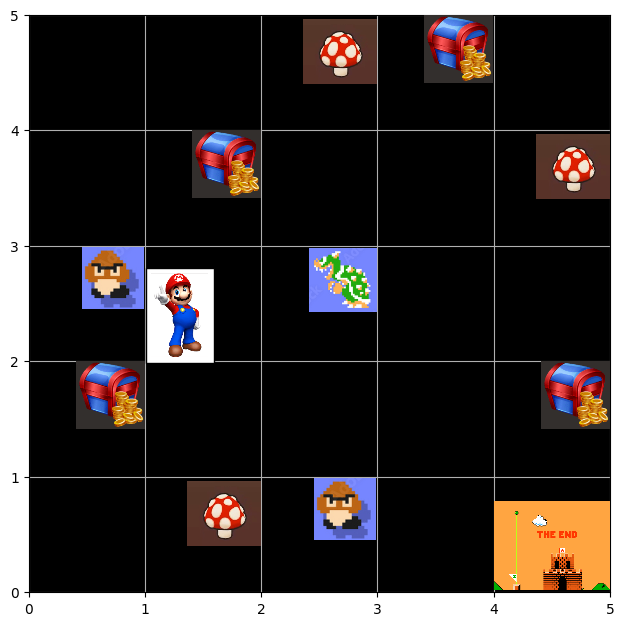

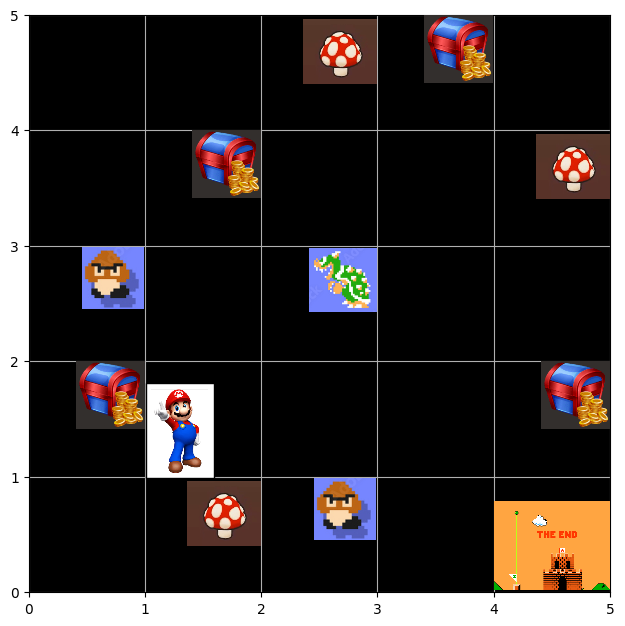

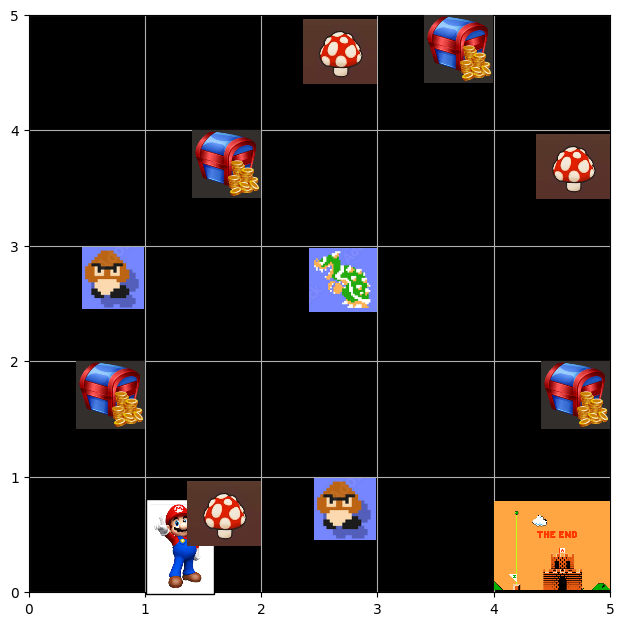

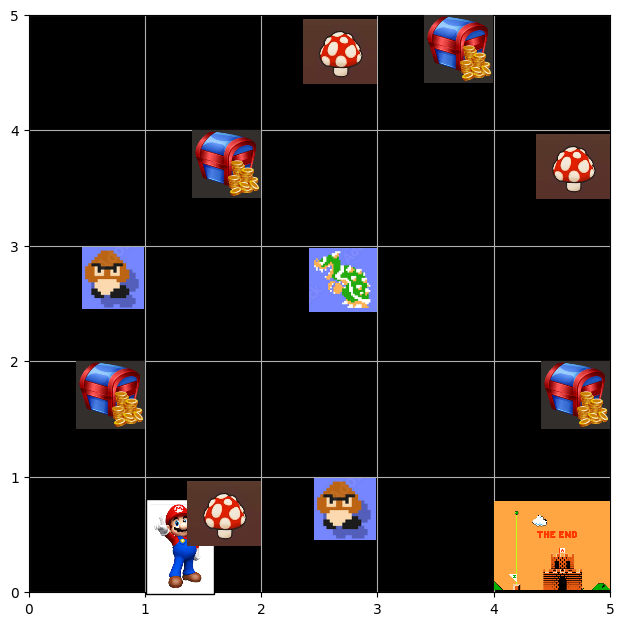

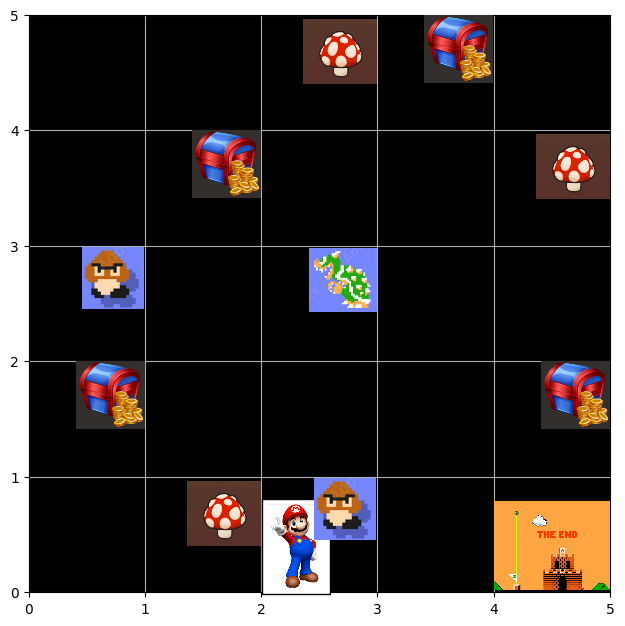

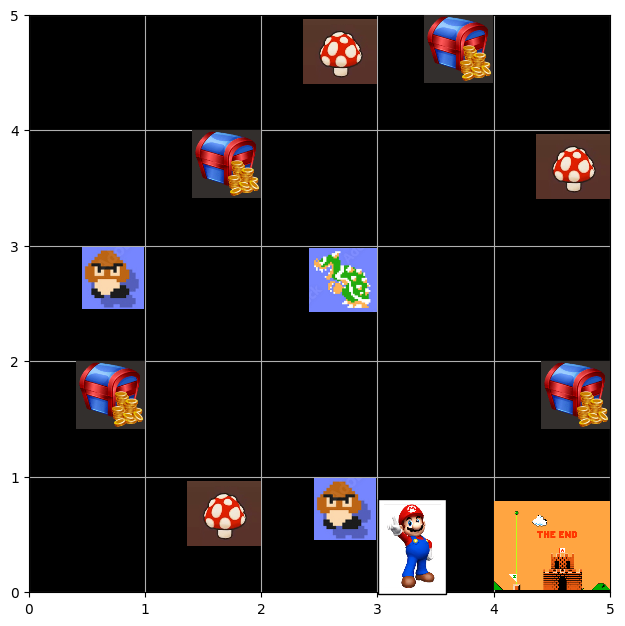

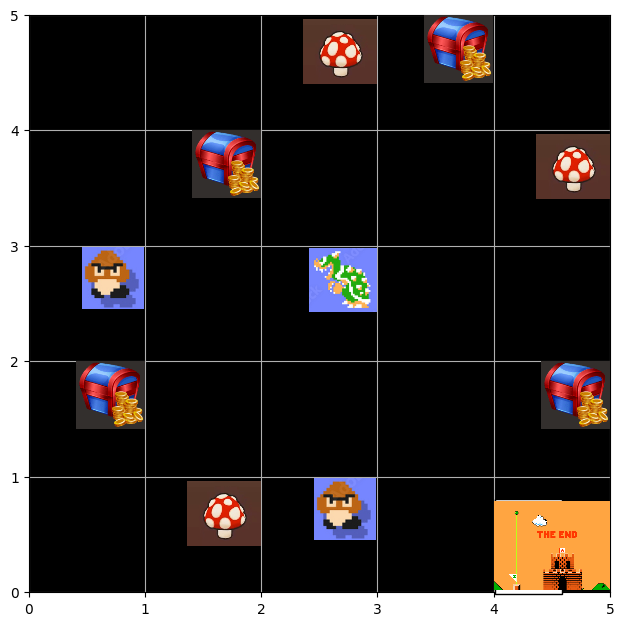

In [95]:
#Running the Mario GridWorld Game in Deterministic Environment
done = False
Actions={3:"Left",1:"Right",2:"Up",0:"Down"}
print("==================================================================================================")
while not done:
    action = random.randint(0,3)
    reward, done, info = env.step(action)
    env.render()
    print("Timestep: {}".format(env.timeStep)+"\t\t\t Performing Action: "+Actions[int(action)])
    print(info)
    print("=================================================================================================")

In [102]:
class Mario_Game_Stochastic_Environment(gym.Env):
    def __init__(self, max_timeSteps):
        #GridWorld Game - Observation space Definition( no. of rows * columns)
        self.observation_space = spaces.Discrete(25)
        #GridWorld Game - Setting the maximum no. of steps agent can take
        self.max_timeSteps = 16
            
    def reset(self):

        #GridWorld Game - Agent's Initial Position
        self.agent_pos = np.array([0, 4])
        #GridWorld Game - Agent's EndGoal Position
        self.end_goal_pos = np.array([4, 0])

        #GridWorld Game - Positions of Gold_Chest (+ Reward)
        self.gold_chest_pos= np.array([[0,1],[1,3],[3,4],[4,1]])
        #GridWorld Game - Positions of Food (+ Reward)
        self.Food_pos = np.array([[2,4],[1,0],[4,3]])
        #GridWorld Game - Positions of devils (- Reward)
        self.devil_pos = np.array([[2,0],[0,2]])
        #GridWorld Game - Positions of dragons (- Reward)
        self.dragon_pos = np.array([[2,2]])

        #GridWorld Game - Setting initial values for rewards, cumulative_rewards,timesteps
        self.rewards = 0      
        self.cumulative_rewards = 0
        self.timeStep = 0
        self.state = np.zeros(grid_world_size)
        self.done = False
        return
    
    def step(self, action):
        #Setting Initial state to a random state from the set of actions 
        self.state = np.random.choice(self.observation_space.n)
        previous_pos = self.agent_pos.copy()
        a = np.random.random()
        #Implementing randomness for the movement or action of agent in Stochastic Environment
        if action == 3:
          if (a<0.76):
            self.agent_pos[0] += 1
          else:
            self.agent_pos[0] +=2
        if action == 2:
          if (a<=0.54):
            self.agent_pos[0] -= 1
          else:
            self.agent_pos = [0,0]
        if action == 1:
          if (a<0.91):
            self.agent_pos[1] += 1
          else:
            self.agent_pos[1] += 2
        if action == 0:
          if (a>0.3):
            self.agent_pos[1] -= 1
          else:
            self.agent_pos = [2,0]

        #To ensure the Agent is within the 5x5 grid limits - clip function
        self.agent_pos = np.clip(self.agent_pos, 0, 4)
        self.state = np.zeros(grid_world_size)
        
        #GridWorld Game Rewards Configuration and Unconfiguration once they are collected
        reward = 0
        #Reward for Previous Position
        if np.all(self.agent_pos == previous_pos):
            reward = -1
        #Reward for End Goal Position
        if (self.agent_pos == self.end_goal_pos).all():
            reward = 50
            self.done = True
            self.rewards += 1
        #Positive Reward for Gold Chest Position
        if (np.any(np.all(self.agent_pos == self.gold_chest_pos, axis=1))):
            reward = 10
            for index in range(len(self.gold_chest_pos)):
                if (self.gold_chest_pos[index]==self.agent_pos).all():
                    self.gold_chest_pos = np.delete(self.gold_chest_pos, index, axis=0)
                    self.rewards += 1
                    break
        #Positive Reward for Food Position
        if (np.any(np.all(self.agent_pos == self.Food_pos, axis=1))):
            reward = 25
            for index in range(len(self.Food_pos)):
                if (self.Food_pos[index]==self.agent_pos).all():
                    self.Food_pos = np.delete(self.Food_pos, index, axis=0)
                    self.rewards += 1
                    break
        #Negative Reward for Devil Position
        if (np.any(np.all(self.agent_pos == self.devil_pos, axis=1))):
            reward = -5
            for index in range(len(self.devil_pos)):
                if (self.devil_pos[index]==self.agent_pos).all():
                    self.devil_pos = np.delete(self.devil_pos, index, axis=0)
                    break
        #Negative Reward for Dragon Position
        if (np.any(np.all(self.agent_pos == self.dragon_pos, axis=1))):
            reward = -10
            for index in range(len(self.dragon_pos)):
                if (self.dragon_pos[index]==self.agent_pos).all():
                    self.dragon_pos = np.delete(self.dragon_pos, index, axis=0)
                    break 

        #Calculating the cummulative rewards until the current timestep
        self.cumulative_rewards += reward
        self.timeStep += 1

        #Checking if we reached Goal Position or reached the maximum timesteps allowed
        if not self.done:
            self.done = True if self.timeStep >= self.max_timeSteps else False

        #Storing the Agent's  Current Position and Reward , Cummulative Rewards
        info = "Current Agent Position: [" + str(self.agent_pos[0]) + "," + str(self.agent_pos[1]) + "] ; " + "Current Reward: " + str(reward) + " ; " + "Total Cumulative Reward: " + str(self.cumulative_rewards)
        return reward, self.done, info
    
    def render(self):
        #Plot size
        fig,ax = plt.subplots(figsize=(7.5,7.5),facecolor="white")
        ax.set_xlim(0,5)
        ax.set_ylim(0,5)
        plt.grid()
        ax.set_facecolor("black")
        agent1_pos,goal1_pos = False,False
        plt.xticks([0,1,2,3,4,5])
        plt.yticks([0,1,2,3,4,5])

        if not agent1_pos:
            #For Agent's Visualization
            agent = AnnotationBbox(OffsetImage(plt.imread('agent.png'), zoom=0.2), list(map(add, self.agent_pos , [0.3, 0.4])), frameon=True)
            ax.add_artist(agent)
        if not goal1_pos:
            #For End Goal Visulaization
            goal = AnnotationBbox(OffsetImage(plt.imread('goal_pos.png'), zoom=0.087), list(map(add, self.end_goal_pos , [0.5, 0.4])), frameon=False)
            ax.add_artist(goal)

        for Food1_pos in self.Food_pos:
            #For Mushrooom Food State Visualization
            Food = AnnotationBbox(OffsetImage(plt.imread('Food.png'), zoom=0.098), list(map(add, Food1_pos, [0.68, 0.68])), frameon=False)
            ax.add_artist(Food)
        for gold1_chest_pos in self.gold_chest_pos:
            #For Gold Chest State Visulaization
            gold = AnnotationBbox(OffsetImage(plt.imread('gold_chest.png'), zoom=0.175), list(map(add, gold1_chest_pos, [0.7, 0.7])), frameon=False)
            ax.add_artist(gold)

        for devil1_pos in self.devil_pos:
            #For Devil state Visualization
            devil = AnnotationBbox(OffsetImage(plt.imread('Devil.png'), zoom=0.25), list(map(add, devil1_pos, [0.72, 0.72])), frameon=False)
            ax.add_artist(devil)
        for dragon1_pos in self.dragon_pos:
            #For Dragon state Visualization
            dragon = AnnotationBbox(OffsetImage(plt.imread('Dragon.png'), zoom=0.2), list(map(add, dragon1_pos, [0.7, 0.7])), frameon=False)
            ax.add_artist(dragon)

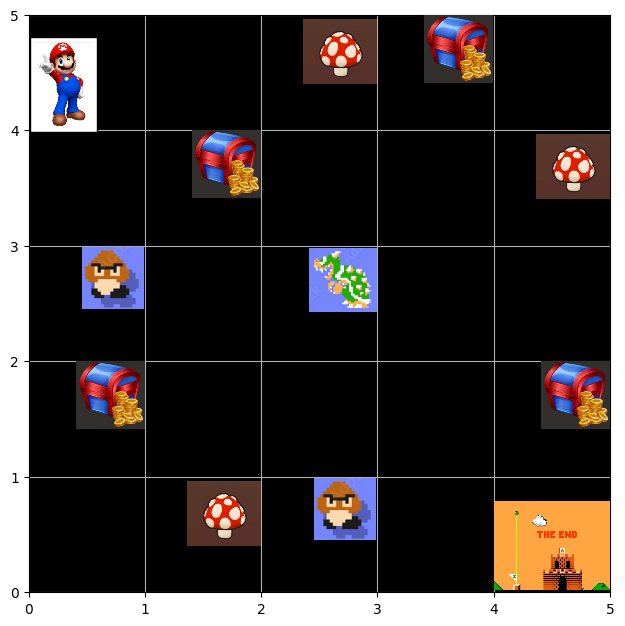

In [110]:
# Initial State Position of the Environment
env = Mario_Game_Stochastic_Environment(16) 
env.reset()
env.render()


Timestep: 1			 Performing Action: 0

Current Agent Position: [0,3] ; Current Reward: 0 ; Total Cumulative Reward: 0

Timestep: 2			 Performing Action: 1

Current Agent Position: [0,4] ; Current Reward: 0 ; Total Cumulative Reward: 0

Timestep: 3			 Performing Action: 3

Current Agent Position: [1,4] ; Current Reward: 0 ; Total Cumulative Reward: 0

Timestep: 4			 Performing Action: 3

Current Agent Position: [2,4] ; Current Reward: 25 ; Total Cumulative Reward: 25

Timestep: 5			 Performing Action: 1

Current Agent Position: [2,4] ; Current Reward: -1 ; Total Cumulative Reward: 24

Timestep: 6			 Performing Action: 3

Current Agent Position: [4,4] ; Current Reward: 0 ; Total Cumulative Reward: 24

Timestep: 7			 Performing Action: 3

Current Agent Position: [4,4] ; Current Reward: -1 ; Total Cumulative Reward: 23

Timestep: 8			 Performing Action: 1

Current Agent Position: [4,4] ; Current Reward: -1 ; Total Cumulative Reward: 22

Timestep: 9			 Performing Action: 0

Current Agent Pos

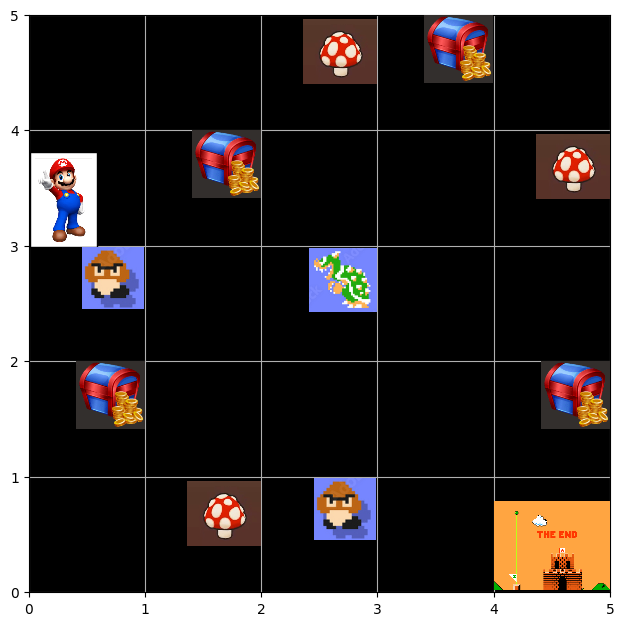

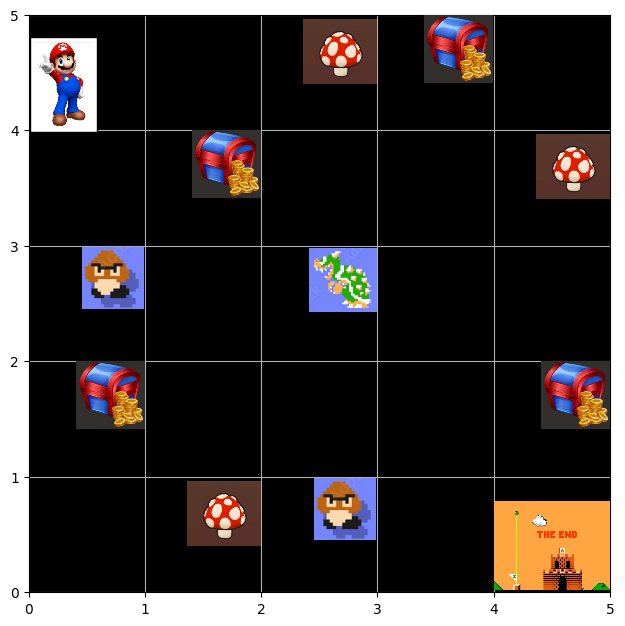

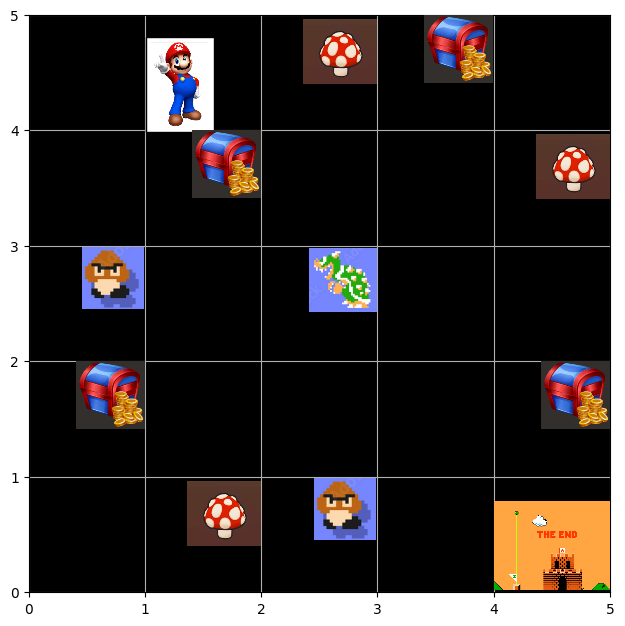

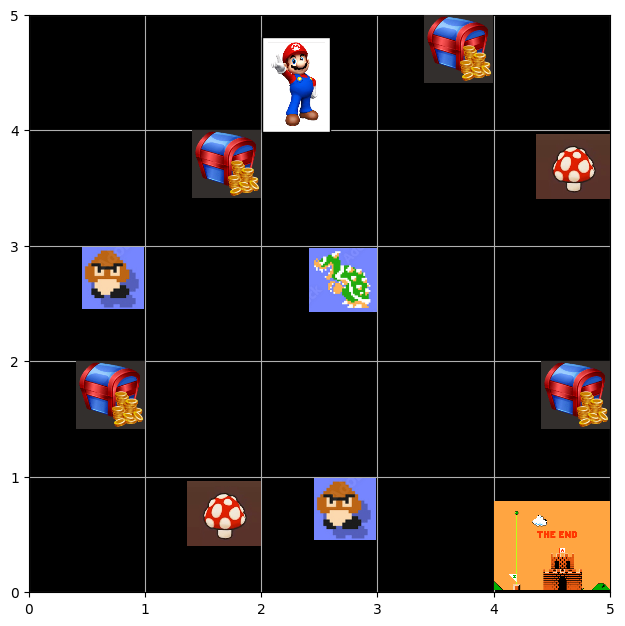

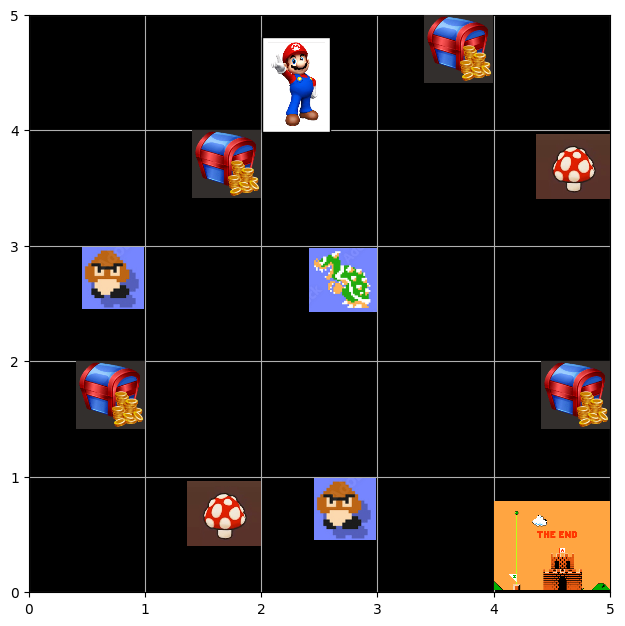

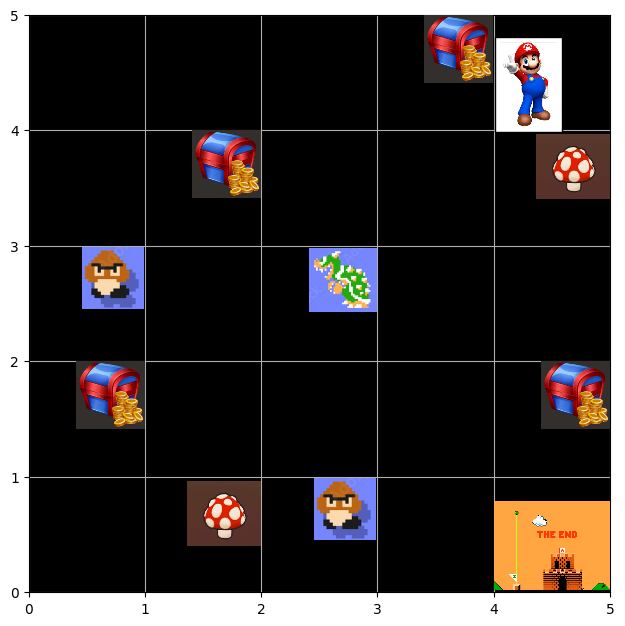

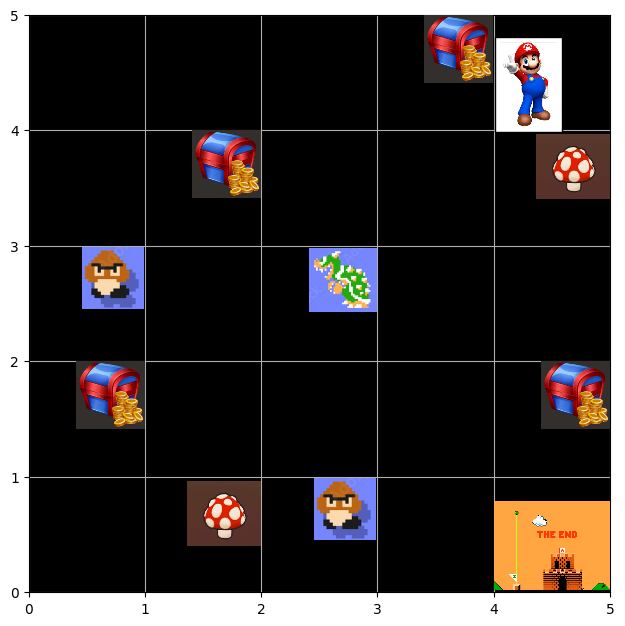

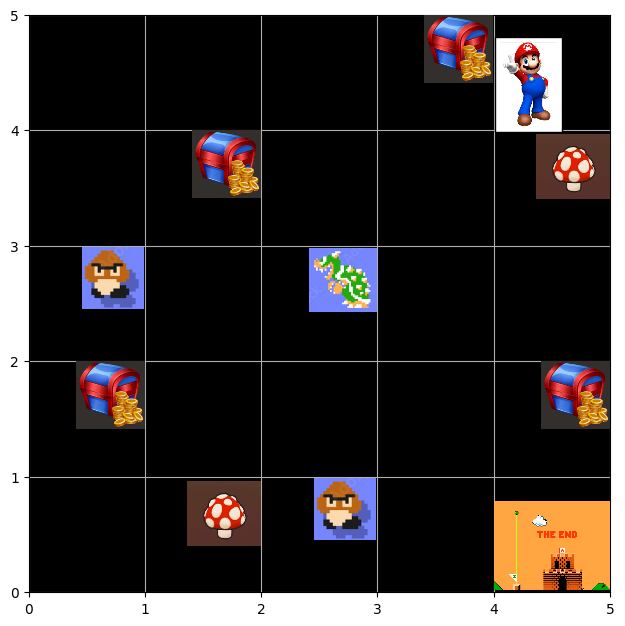

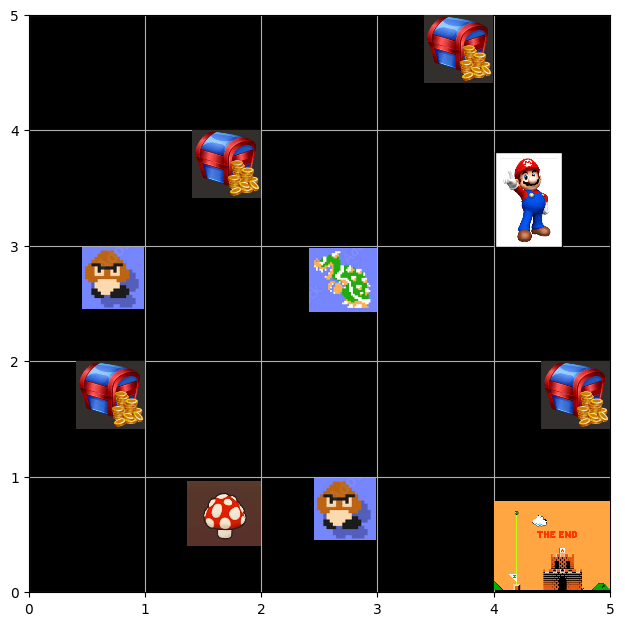

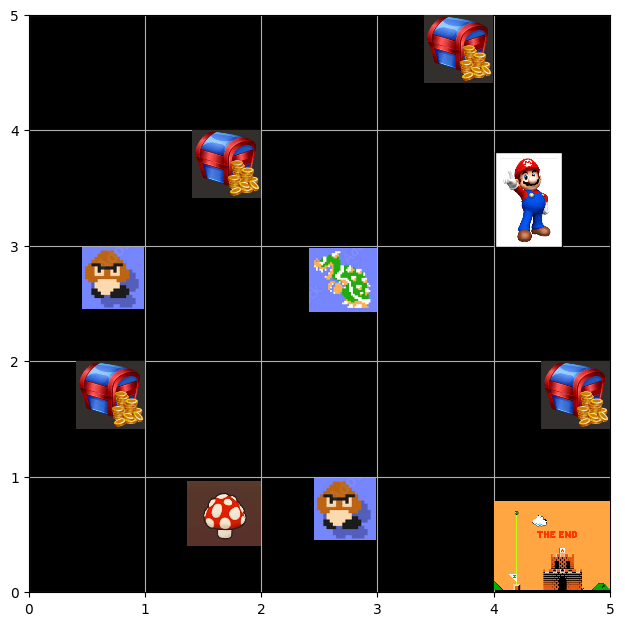

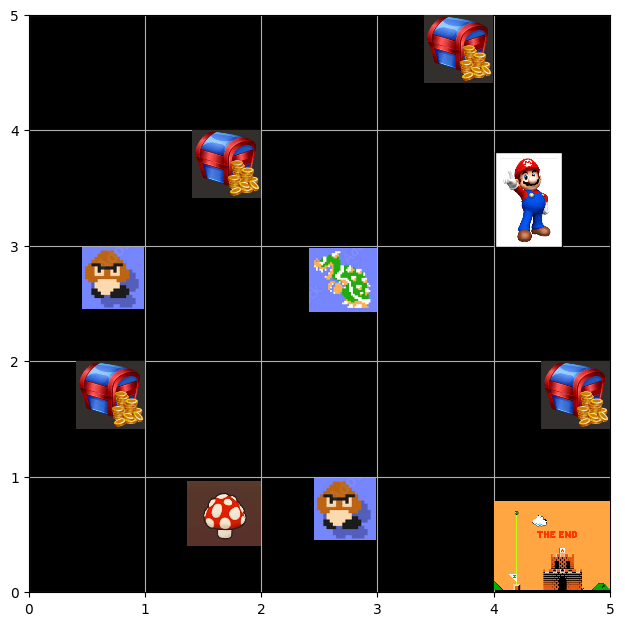

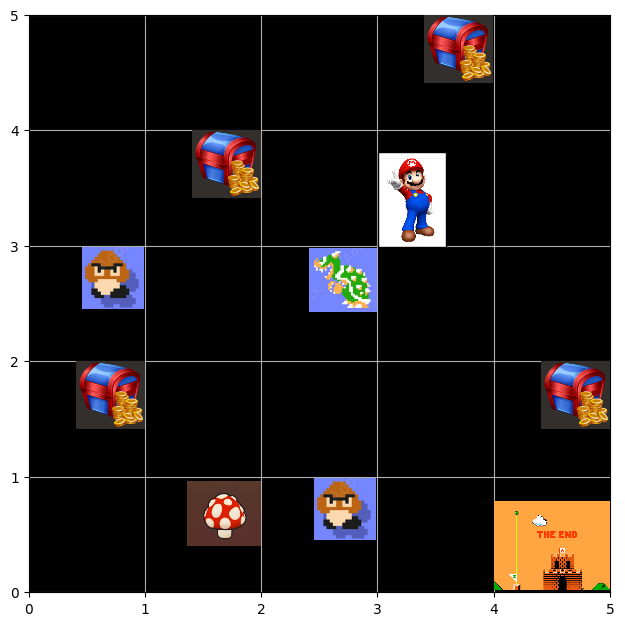

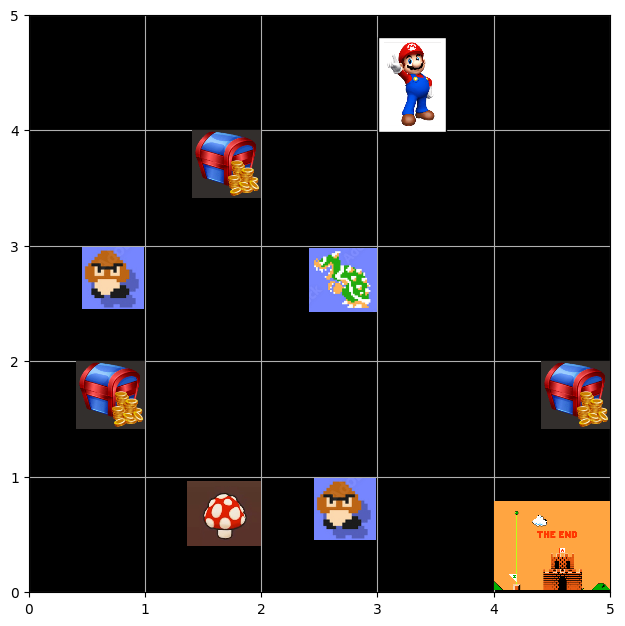

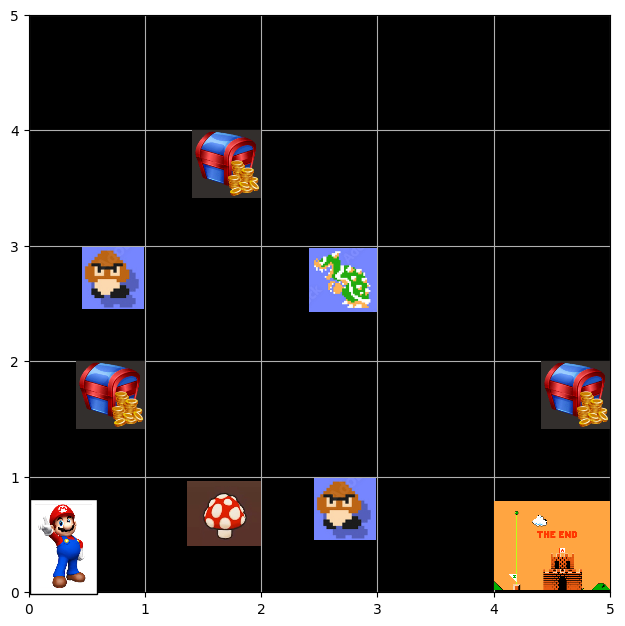

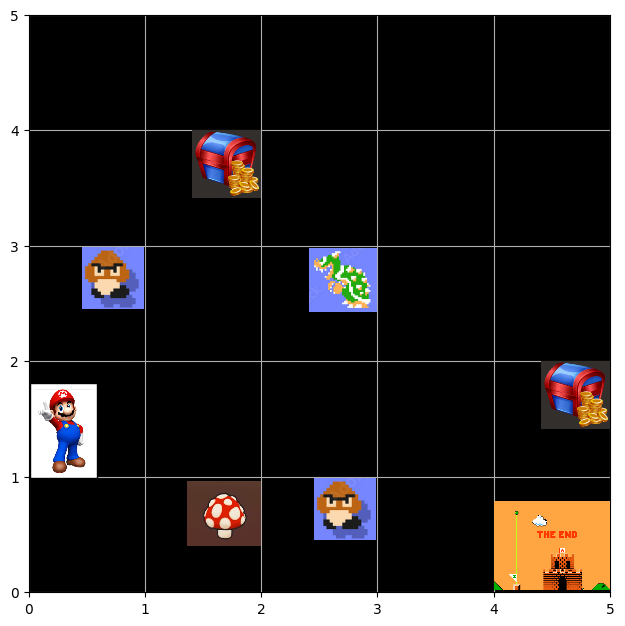

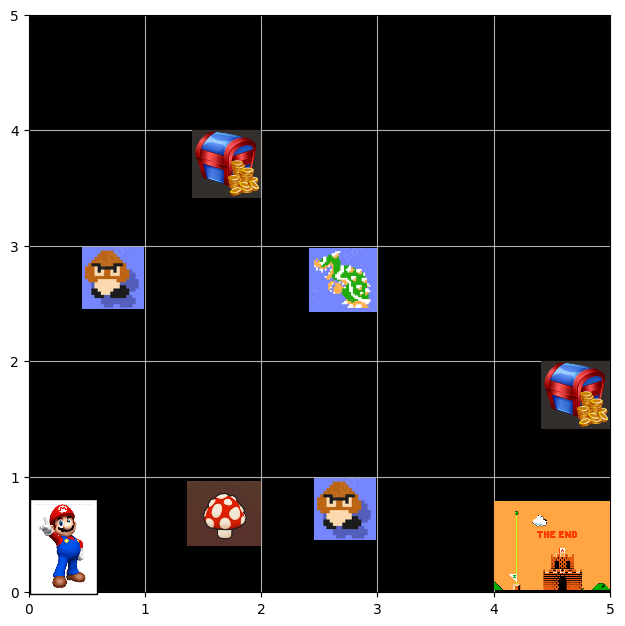

In [111]:
#Running the Mario GridWorld Game in Stochastic Environment
done = False
print("\n==================================================================================================")
while not done:
    action = random.randint(0,3)
    reward, done, info = env.step(action)
    env.render()

    print("Timestep: {}".format(env.timeStep)+"\t\t\t Performing Action: {}\n".format(action))
    print(info)
    print("\n==================================================================================================")